In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load your Excel file
df = pd.read_excel("PCF_data.xlsx")  # Change the path if needed

In [ ]:
df.shape

(1118, 11)

In [ ]:
print(df.head(5))

   core-ref-index-at-wl-1.55um  clad-ref-index  no-of-\nrings  diaBYpitch  \
0                        1.444               1              4         0.6   
1                        1.444               1              4         0.6   
2                        1.444               1              4         0.6   
3                        1.444               1              4         0.6   
4                        1.444               1              4         0.6   

   pitch\n(um)  wl\n(um)     neff  Aeff\n(um^2)  dispersion\n(ps/km.nm)  \
0          0.8   1.58333  1.33418       5.02490                -457.994   
1          0.8   1.41322  1.34653       2.81363                -502.289   
2          0.8   1.27612  1.35866       1.96006                -432.099   
3          0.8   1.16327  1.37008       1.55828                -314.841   
4          0.8   1.06875  1.38044       1.33372                -198.731   

   conf-loss\n(dB/cm)  conf-loss-in-log10\n(dB/cm)  
0          155.015000            

In [ ]:
# Define input and output columns
input_cols = [
    "core-ref-index-at-wl-1.55um", "no-of-\nrings", "diaBYpitch", "pitch\n(um)", "wl\n(um)"
]
output_cols = [
    "neff", "Aeff\n(um^2)", "dispersion\n(ps/km.nm)",
    "conf-loss-in-log10\n(dB/cm)"
]

In [ ]:
# Split features and labels
X = df[input_cols].values
y = df[output_cols].values

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Base model
base_model = RandomForestRegressor(n_estimators=200, random_state=3)

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200, random_state=3),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best model
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Output results
print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error on Test Set:", mse)
print("R2 Score on Test Set:", r2)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2}
Mean Squared Error on Test Set: 69.75274098576104
R2 Score on Test Set: 0.9815617619042667


In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
import matplotlib.pyplot as plt

# Extract actual and predicted values for 'neff'
actual_neff = y_test['neff']
predicted_neff = y_pred[:, 0]  # 'neff' is the first column in multi-output prediction

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_neff, predicted_neff, color='blue', edgecolor='k', alpha=0.7)
plt.plot([actual_neff.min(), actual_neff.max()],
         [actual_neff.min(), actual_neff.max()], 'r--', lw=2)

plt.xlabel("Actual neff")
plt.ylabel("Predicted neff")
plt.title("Actual vs Predicted neff")
plt.grid(True)
plt.tight_layout()
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

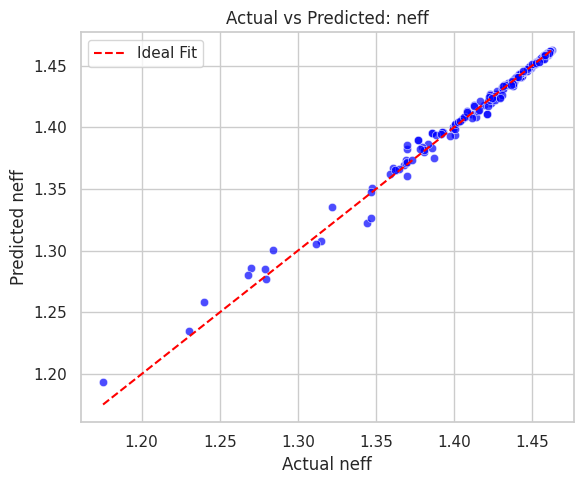

In [ ]:
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Index for 'neff'
neff_index = output_columns.index("neff")

# Plot actual vs predicted for neff
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test[:, neff_index], y=y_pred[:, neff_index], color="blue", alpha=0.7)
plt.plot(
    [min(y_test[:, neff_index]), max(y_test[:, neff_index])],
    [min(y_test[:, neff_index]), max(y_test[:, neff_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual neff")
plt.ylabel("Predicted neff")
plt.title("Actual vs Predicted: neff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Index of the 'neff' column
neff_index = output_cols.index("neff")

# Create DataFrame with actual and predicted neff
neff_comparison_df = pd.DataFrame({
    'Actual neff': y_test[:, neff_index],
    'Predicted neff': y_pred[:, neff_index]
})

# Show first 10 rows
neff_comparison_df.head(10)

,Actual neff,Predicted neff
0,1.45995,1.460089
1,1.26995,1.285708
2,1.44764,1.447709
3,1.40054,1.393708
4,1.44430,1.445285
5,1.45948,1.460018
6,1.43744,1.434765
7,1.44543,1.445174
8,1.45154,1.451056
9,1.27882,1.285186


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Extract actual and predicted values for neff
neff_index = output_cols.index("neff")
y_test_actual_neff = y_test[:, neff_index]
y_test_predicted_neff = y_pred[:, neff_index]

# Calculate metrics
mse = mean_squared_error(y_test_actual_neff, y_test_predicted_neff)
mape = mean_absolute_percentage_error(y_test_actual_neff, y_test_predicted_neff)
r2 = r2_score(y_test_actual_neff, y_test_predicted_neff)

# Print results
print("For Neff:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Neff:
Mean Squared Error (MSE): 2.097321620498904e-05
Mean Absolute Percentage Error (MAPE): 0.001801226390297076
R² Score: 0.9901093305220587


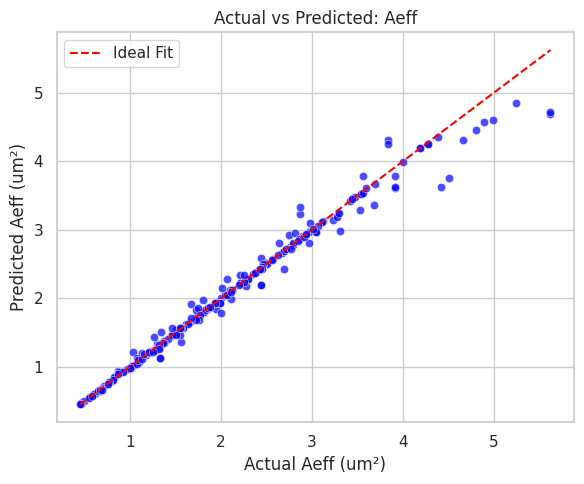

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Index for 'Aeff'
aeff_index = output_cols.index("Aeff\n(um^2)")

# Plot actual vs predicted for Aeff
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test[:, aeff_index], y=y_pred[:, aeff_index], color="blue", alpha=0.7)
plt.plot(
    [min(y_test[:, aeff_index]), max(y_test[:, aeff_index])],
    [min(y_test[:, aeff_index]), max(y_test[:, aeff_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual Aeff (um²)")
plt.ylabel("Predicted Aeff (um²)")
plt.title("Actual vs Predicted: Aeff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Index for 'Aeff'
aeff_index = output_cols.index("Aeff\n(um^2)")

# Create DataFrame with actual and predicted neff
aeff_comparison_df = pd.DataFrame({
    'Actual aeff': y_test[:, aeff_index],
    'Predicted aeff': y_pred[:, aeff_index]
})

# Show first 10 rows
aeff_comparison_df.head(10)

,Actual aeff,Predicted aeff
0,2.38550,2.383071
1,1.34356,1.506006
2,2.00201,2.001032
3,3.91181,3.609339
4,3.04135,2.969246
5,1.93621,1.940309
6,2.44292,2.202070
7,3.11967,3.127561
8,1.62180,1.627702
9,4.42229,3.618541


In [ ]:
# Extract actual and predicted values for aeff
aeff_index = output_cols.index("Aeff\n(um^2)")
y_test_actual_aeff = y_test[:, aeff_index]
y_test_predicted_aeff = y_pred[:, aeff_index]

# Calculate metrics
mse = mean_squared_error(y_test_actual_aeff, y_test_predicted_aeff)
mape = mean_absolute_percentage_error(y_test_actual_aeff, y_test_predicted_aeff)
r2 = r2_score(y_test_actual_aeff, y_test_predicted_aeff)

# Print results
print("For Aeff:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Aeff:
Mean Squared Error (MSE): 0.025800641414919816
Mean Absolute Percentage Error (MAPE): 0.028717764888802344
R² Score: 0.9794730075309125


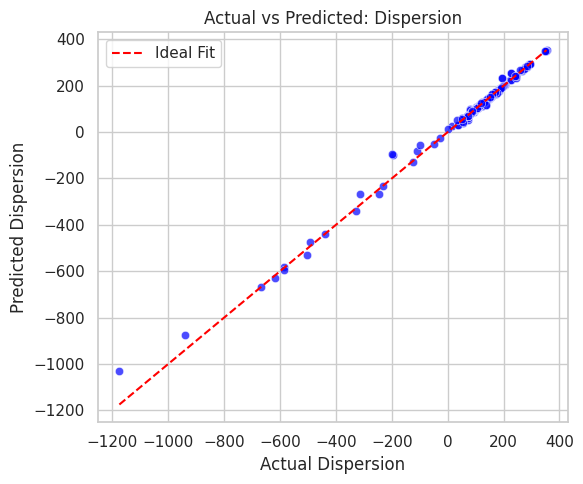

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Index for 'dispersion'
dispersion_index = output_cols.index("dispersion\n(ps/km.nm)")

# Plot actual vs predicted for dispersion
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test[:, dispersion_index], y=y_pred[:, dispersion_index], color="blue", alpha=0.7)
plt.plot(
    [min(y_test[:, dispersion_index]), max(y_test[:, dispersion_index])],
    [min(y_test[:, dispersion_index]), max(y_test[:, dispersion_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual Dispersion")
plt.ylabel("Predicted Dispersion")
plt.title("Actual vs Predicted: Dispersion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get index of dispersion column
dispersion_index = output_cols.index("dispersion\n(ps/km.nm)")

# Create a comparison DataFrame
dispersion_comparison_df = pd.DataFrame({
    'Actual dispersion (ps/km·nm)': y_test[:, dispersion_index],
    'Predicted dispersion (ps/km·nm)': y_pred[:, dispersion_index]
})

# Show first 10 rows
dispersion_comparison_df.head(10)

,Actual dispersion (ps/km·nm),Predicted dispersion (ps/km·nm)
0,95.9942,95.476958
1,-245.8160,-268.185330
2,135.9660,135.636700
3,105.8180,105.806523
4,100.8000,100.598296
5,108.1700,105.910379
6,111.0500,111.629869
7,107.6340,107.221117
8,130.4000,130.551380
9,-667.3510,-669.866720


In [ ]:
# Extract actual and predicted values
y_test_actual_disp = y_test[:, dispersion_index]
y_test_predicted_disp = y_pred[:, dispersion_index]

# Calculate metrics
mse_disp = mean_squared_error(y_test_actual_disp, y_test_predicted_disp)
mape_disp = mean_absolute_percentage_error(y_test_actual_disp, y_test_predicted_disp)
r2_disp = r2_score(y_test_actual_disp, y_test_predicted_disp)

# Print results
print("For Dispersion:")
print("Mean Squared Error (MSE):", mse_disp)
print("Mean Absolute Percentage Error (MAPE):", mape_disp)
print("R² Score:", r2_disp)

For Dispersion:
Mean Squared Error (MSE): 277.4202010554974
Mean Absolute Percentage Error (MAPE): 0.19040057330218255
R² Score: 0.9921512195635745


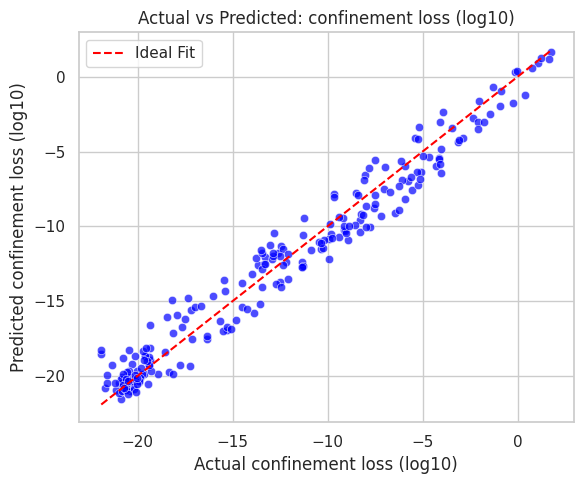

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Index for 'conf-loss-in-log10'
log_loss_index = output_cols.index("conf-loss-in-log10\n(dB/cm)")

# Plot actual vs predicted for conf-loss-in-log10
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=y_test[:, log_loss_index],
    y=y_pred[:, log_loss_index],
    color="blue",
    alpha=0.7
)
plt.plot(
    [min(y_test[:, log_loss_index]), max(y_test[:, log_loss_index])],
    [min(y_test[:, log_loss_index]), max(y_test[:, log_loss_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual confinement loss (log10)")
plt.ylabel("Predicted confinement loss (log10)")
plt.title("Actual vs Predicted: confinement loss (log10)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get index of 'conf-loss-in-log10'
# log_loss_index = output_columns.index("conf-loss-in-log10")

# Create DataFrame with actual and predicted values
log_loss_comparison_df = pd.DataFrame({
    'Actual conf-loss-in-log10': y_test[:, log_loss_index],
    'Predicted conf-loss-in-log10': y_pred[:, log_loss_index]
})

# Show first 10 rows
log_loss_comparison_df.head(10)

,Actual conf-loss-in-log10,Predicted conf-loss-in-log10
0,-20.713099,-20.666901
1,-2.351313,-2.781685
2,-20.040634,-19.656523
3,-12.808432,-10.473170
4,-7.008026,-7.480113
5,-20.846069,-21.555848
6,-8.514392,-7.791169
7,-16.026442,-14.647731
8,-11.300411,-10.592796
9,1.787248,1.642371


In [ ]:
# Extract actual and predicted values
y_test_actual_log_loss = y_test[:, log_loss_index]
y_test_predicted_log_loss = y_pred[:, log_loss_index]

# Calculate metrics
mse_log = mean_squared_error(y_test_actual_log_loss, y_test_predicted_log_loss)
mape_log = mean_absolute_percentage_error(y_test_actual_log_loss, y_test_predicted_log_loss)
r2_log = r2_score(y_test_actual_log_loss, y_test_predicted_log_loss)

# Print results
print("For conf-loss-in-log10:")
print("Mean Squared Error (MSE):", mse_log)
print("Mean Absolute Percentage Error (MAPE):", mape_log)
print("R² Score:", r2_log)

For conf-loss-in-log10:
Mean Squared Error (MSE): 1.5649412729157017
Mean Absolute Percentage Error (MAPE): 0.24625579865694608
R² Score: 0.964513490000521
